# PRINCIPAL COMPONENTS ANALYSIS

Principal components are a sequence of projections of the data, mutually uncorrelated (orthogonal) and ordered in variance.
In algebraic terms, our goal is finding an orthogonal base of the space of input variables (its inner product being the covariance function), and then keep just enough elements of this base so we can explain most of the variance of the target variable. 

If we had $X_1, ..., X_N$ random variables with know distribution or density functions, we would be able to build the covariance matrix $\text{Cov}(X_i,X_j)_{1\le i,j\le N}$, and in order to find the principal components we would need to diagonalize this matrix. We would obtain $Z_1,...,Z_M$ eigenvectors ($M\le N$) and $\lambda_1,..,\lambda_M$ eigenvalues associated (it could be $\lambda_i = \lambda_k$ for some $i,k \in \{1,...,M\}$). This way we may have eliminated redundant variables (as $M\le N$) and we would know (by the eigenvalue) which directions imply the greatest variance. If some of them are residual, we may as well dismissed them, and just keep enough variables $Z_i$ to explain most of the variance.

Things are not this straight forward when dealing with real problems where PCA might be helpful. The idea underlying follows the principles exposed above, but the resolution of the problem won't be so simple. Because of its importance when dealing with this PCA problems, lets delve a bit into Singular Value Decomposition (SVD)

The SVD is a factorization of a matrix (real or complex) into a rotation, followed by a rescalling followed by another rotation. It is a generalization of the eigendecomposition of a square normal matrix ($X=P^TDP$) where $P$ is the matrix of eigenvectors and $D$ is a diagonal matrix of the eigenvalues. For a $m\times n$ real matrix $M$, the SVD is of the form $M=U\Sigma V^T$, where $U$ is an $m\times m$ unitary matrix (this is, $U^TU=I_m$), $\Sigma$ is a $m\times n$ rectangular diagonal matrix with non-negative real numbers on the diagonal and $V$ is an $n\times n$ unitary matrix. There a series of results proving that the SVD exists, and if we require the diagonal values to be ordered from greatest to lowest, this decomposition is uniquely defined.

Let $X$ be an $n\times p$ matrix containing our $n$ observations of $p$ variables. The sample covariance matrix is given by $S=X^TX/n$. Let $UDV^T$ be the SVD of the matrix $X$, then:
$$ S=\dfrac{VD^2V^T}{n}$$
which is an eigendecomposition of the matrix $S$. This way, we have obtained the principal components of the variables in $X$ (which are the columns of the matrix $V$) and their associated variances (which are the diagonal values of $D^2$).

After this discussion, it is clear why SVD plays a significant role when computing PCA, and its use is widely stablished. 

### Example

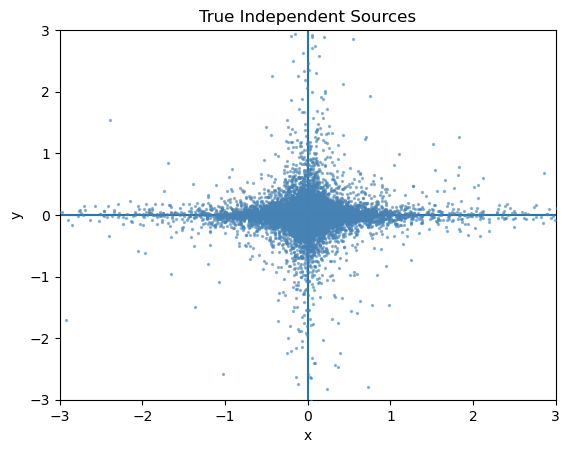

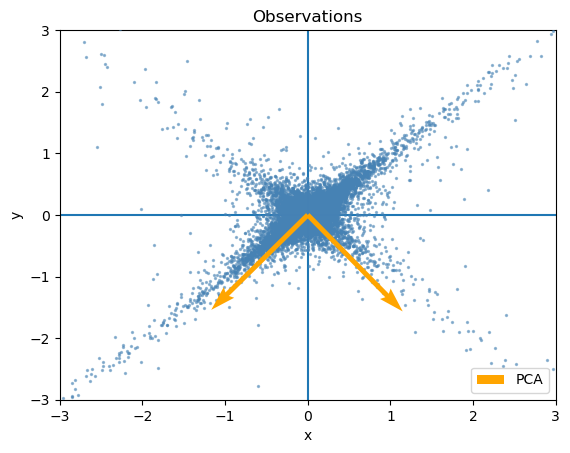

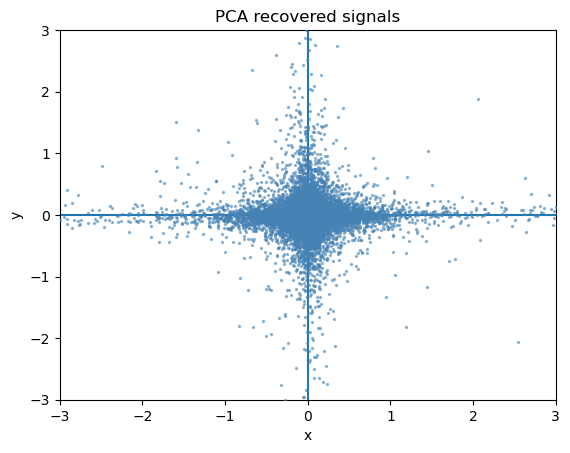

In [17]:
import numpy as np

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.0

# We build a dataset with linear combinations of our inpendent original observations
A = np.array([[1, 1], [1, -1]])  # Mixing matrix
X = np.dot(S, A)  # Generate observations

#defined pca as an instance of the class PCA from sklearn
pca = PCA()
#fit the model to our mixed observations
pca.fit(X)
#recovering the "original" observations --> we are extracting the independent variables from the mixed observations
S_pca_ = pca.transform(X)

def plot_samples(S, axis_list=None):
    plt.scatter(
        S[:, 0], S[:, 1], s=2, marker="o", zorder=10, color="steelblue", alpha=0.5
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            axis /= axis.std()
            x_axis, y_axis = axis
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -3, 3)
    plt.vlines(0, -3, 3)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel("x")
    plt.ylabel("y")


plt.figure()
#plt.subplot(1, 3, 1)
plot_samples(S / S.std())
plt.title("True Independent Sources")
plt.show()

axis_list = [(pca.components_.T, "orange", "PCA")]
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(loc="lower right")
legend.set_zorder(100)
plt.title("Observations")
plt.show()

#plt.subplot(1,3, 3)
plot_samples(S_pca_ / np.std(S_pca_, axis=0))
plt.title("PCA recovered signals")
plt.show()
#plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
#plt.tight_layout()
#plt.show()


Bibliografía: 
- https://scikit-learn.org/stable/modules/decomposition.html#pca
- https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_vs_pca.html#sphx-glr-auto-examples-decomposition-plot-ica-vs-pca-py
- Trevor, et al. The elements of statistical learning: data mining, inference, and prediction. New York: springer, 2009.
- https://en.wikipedia.org/wiki/Singular_value_decomposition
